## About this tutorial 

To do deep learning in practice, you need a Graphics Processing Unit (GPU). Or the time needed to train your deep neural nets on the CPU of your machine will be prohibitive.

We have seen how to [install TensorFlow on Windows](https://thedatafrog.com/install-tensorflow-windows/) and [on Linux](https://thedatafrog.com/install-tensorflow-ubuntu/), which is useful if you have an nvidia graphics card in your PC. 

But what if you don't? 

If you just want to learn deep learning, there is a very easy solution that requires **no specific hardware or software**, the Colaboratory platform from Google.

Let's try and use it for the first time. 

In this tutorial, you will learn: 

* What is the google colaboratory platform and how to use it. 
* How to set up a first convolutional neural network to recognize handwritten digits with very high accuracy 

**Prerequisites**

* Please have a look at [my first tutorial on handwritten digits](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/). This will show you which kind of performance we can get without deep learning, and will teach you the basics of numpy, matplotlib, and neural networks. 
* You should know a bit of [Keras](https://thedatafrog.com/first-neural-network-keras/)


## The Google Colaboratory Platorm

Google set up the [Colaboratory Platform](https://colab.research.google.com/notebooks/welcome.ipynb) to promote the use of TensorFlow for deep learning, and it's awesome! 

It provides: 

* python environments with all the necessary software, and you can install more if needed
* access to GPUs
* excellent tutorials
* the possibility to run your own code (and my stuff!)

In particular, the author of Keras and google engineer François Chollet set up extremely useful tutorials in which Keras is used as an interface to TensorFlow, such as [this one](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb) where we learn how to classify clothing items (trousers, shoes, and whatnot). 

I do encourage you to dig into the google colab tutorials on your own! I would only advise you to stick to the keras-based tutorials which are much easier. 

On my side, I intend to use this tool to provide you with original content, and more details about the subjects already covered by google. 

💡 **To run your jupyter notebook on google colab, you just need to commit it to github, and to provide a specific url to direct google colab to the notebook.**

The url of this tutorial on github is https://github.com/cbernet/maldives/blob/master/hwd_deeplearning_google/hwd_dl_google.ipynb

The url to run it on google colab is https://colab.research.google.com/github/cbernet/maldives/blob/master/hwd_deeplearning_google/hwd_dl_google.ipynb

Just follow this link now, and click on CONNECT on the top right side. 


## The Dataset

In [my first tutorial on handwritten digits](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/), we have used the simplify digits dataset provided with scikit-learn for simplicity, and because we didn't have the resources to process the [real MNIST handrwitten digits dataset](http://yann.lecun.com/exdb/mnist/) at that time. 

Here, we have access to TensorFlow, which provides an easy access to this dataset

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Let's have a look our dataset.

In [3]:
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


so: 

* 60,000 training samples and 10,000 test samples
* images are 28x28 = 784 pixels, while they are 8x8=64 pixels in the digits dataset of sckikit-learn. We have images with much better resolution, but need networks with many more neurons to process them

Now let's plot some of them. 

In [4]:
import matplotlib.pyplot as plt
def plot_img(i):
    # plot the image and the target for sample i
    plt.imshow(x_train[i])
    plt.title(y_train[i])

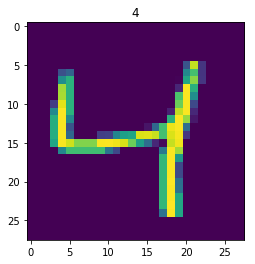

In [5]:
plot_img(2)

Please have a look at other images by repeating the plot above for different samples

Now we should check the actual data for a given image:

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We see that the values in the image array are between 0 and 255 (the values are coded on 8 bits). 

This is not adequate. Indeed, for a neural network to work well, it must deal with input values close to unity, and the weights in the network should be kept small. So we're going to normalize all images to values between 0. and 1: 

In [7]:
import numpy as np
x_train = np.divide(x_train, 255.)
print np.amax(x_train)

1.0


💡 **Always normalize your input data.**

In [8]:
x_test = np.divide(x_test, 255.)

We should also check our targets: 

In [9]:
y_train[0]

5

For the reasons explained in [our first keras tutorial](https://thedatafrog.com/first-neural-network-keras/), we're going to perform one-hot encoding on the targets: 

In [10]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
print y_train[0]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Using TensorFlow backend.


In [11]:
y_test = np_utils.to_categorical(y_test, 10)

## Convolutional Neural Networks

Classifying handwritten digits in 10 categories is a task of image recognition. 

Since convolutional neural networks are known to provide excellent performance for image recognition, we're going to use them. 

A convolutional neural network for image classification typically features the following layers: 

* the first layers are **convolutional layers**, interleaved with **pooling layers**. The role of these layers is to extract interesting features from the image.
* then come  **dense layers**, which interpret the features from the first stage, and provides the probability for the image to belong to each category. 

In addition to these, **dropout** layers can be added to normalize the network or in other words, to make it more stable 

Before building the network, I'd like to explain each kind of layer in details. 

### Convolutional layers

A 2D [convolutional layer](https://keras.io/layers/convolutional/) scans the input image from left to right and from top to bottom, with a small window, called the **kernel**. In the example below, we use a window of 5x5 pixel. After every step, the image moves right. Here, we use a **stride** of 1 pixel, meaning that we move the window by 1 pixel. When the right border of the window hits the right border of the image, the window is returned to the left and moved down by 1 pixel. 

![](conv_layer.png)

At each step, the pixels within the window are considered and a number of features are extracted. These features are just some values, and let's say there are **nf** features to be extracted for each position of the window (nf could be of the order of 10). 

At first these features are completely meaningless, but the network is going to be trained to extract meaningful features. For example, if you do face recognition, the features might be related to the presence of an eye or a nose. We will have a look at that later in the context of our handwritten digit recognition problem. For now, just keep in mind that a fixed number of values are extracted for each window, and that these values are going to make sense to the network (and maybe not to us!).

Now, what kind of data do we get out of the convolutional layer? 
Let **(nx, ny)** be the shape of the picture, so nx and ny are the numbers of pixels in the image along the horizontal and vertical directions, respectively. 

For each window position, we get 10 features, and the window positions are arranged in a 2D array. So the output of the convolutional layer is a 3D array (ox, oy, nf), where **ox** and **oy** are the numbers of output pixels along the horizontal and vertical directions, and nf is the number of features for each pixel.

The user (we) decide on the number of features to be extracted, so we know that. But what about ox and oy? 

The answer is simple. For example: **ox = nx - kernel_size + 1**. 

To convince yourself, you can use the simple case below, with an image of size 7x5 and a window of size 3x3.  

![](conv_layer_simple.png)

Ok... I have spent three hours in blender trying to model a convolutional layer in 3D as an illustration, and barely managed to model a cube. So I gave up on this software and, as a last resort, went back to my favorite 3D modelling hardware: 

![](crayon.png)

And here's the result, with shading and transparency! 

![](conv_layer_schema.png)

### Pooling layers

Pooling layers are used to reduce the size of the data at a given stage to reduce the complexity of the network. In this case we will use 2D pooling layers, and in particular, the [MaxPooling2D](https://keras.io/layers/pooling/). 

The keras documentation is a bit scarce, so let's see how it works on a simple image. Here we use [seaborn](https://seaborn.pydata.org/), a high-level interface to matplotlib, to get a heat map with annotations.

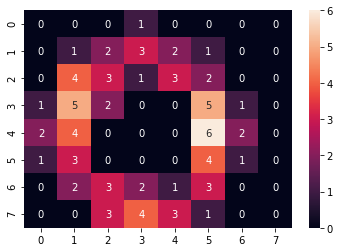

In [12]:
import numpy as np
import seaborn as sns
zero = np.array([[0,0,0,1,0,0,0,0],
                 [0,1,2,3,2,1,0,0],
                 [0,4,3,1,3,2,0,0],
                 [1,5,2,0,0,5,1,0],
                 [2,4,0,0,0,6,2,0],
                 [1,3,0,0,0,4,1,0],
                 [0,2,3,2,1,3,0,0],
                 [0,0,3,4,3,1,0,0]])
sns.heatmap(zero, annot=True)

Pooling layers are based on a pooling window that moves across the image like the kernel of the convolutional layers. For every position of the pooling window, a number is extracted, for example: 

* the maximum value in the window (max pooling)
* the average value over the window (average pooling)

If we use a pooling window of 2x2 pixels, the extracted value would be 1 in the case of max pooling, and 1/4 = 0.25 in the case of average pooling. 

We're going to use [scikit-image](http://scikit-image.org/docs/dev/auto_examples/numpy_operations/plot_view_as_blocks.html) to perform each pooling operation. By the way I didn't know scikit-image, I just googled it. It's always useful to do that when you're trying to do something in python

In [13]:
from skimage.util import view_as_blocks
pooling_window_shape = (2,2)
view = view_as_blocks(zero, pooling_window_shape)
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)
mean_view = np.mean(flatten_view, axis=2)
max_view = np.max(flatten_view, axis=2)

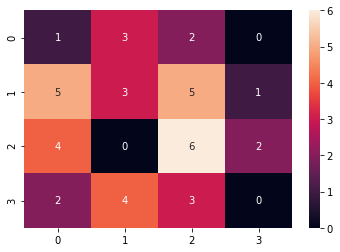

In [14]:
sns.heatmap(max_view, annot=True)

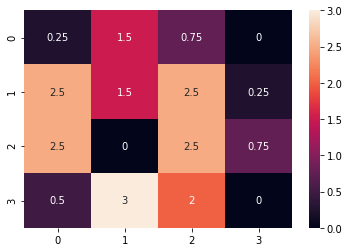

In [15]:
sns.heatmap(mean_view, annot=True)

Coming back to our case, we will want to pool after a convolutional layer. The input to the pooling is a 3D array with several values (the features) for each pixel. 

In this case, the pooling layer will pool each feature separately for each pixel in x and y.

So the pooling will reduce the dimensionality along the x and y directions, but the number of features in output will stay the same. That's good, because maxing or averaging over all features would not make any sense. 

### Dense layers

A sub-network of dense layers is added at the end of the deep neural network. The aim of this sub-network is to make use of the features extracted by the previous layers to perform the classification.

We know about dense layers already, since the tutorial about [handwritten digits with scikit-learn](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/), so I'm not going to give details here. 

Two things to note: 

**1- Dense layers are fully connected to the previous layer.** This means that each neuron in the dense layer has a connection to all neurons in the previous layer. 

**2- The input to a dense layer is 1D.** But the output of our convolutional (or pooling) layers is 3D... So we will need to flatten the 3D data to 1D, by just serializing all numbers. To do that in keras, we will insert a [Flatten layer](https://keras.io/layers/core/) just before the dense layer. 

The last layer of our dense sub-network will have a **softmax activation**. This means that the output of neuron $k$ is set to 

$$y_k = \frac{e^{z_k}}{\sum_{i=1}^{N} e^{z_i}}$$,

where the sum runs over the N neurons of the layer. 

Please note that the softmax activation is well suited to classification problems: 

* the probability for a given class is bound between 0 and 1. 
* all probabilities sum up to 1

### Dropout layers 

Deep convolutional neural networks are complicated and have a lot of tunable parameters. And for this reason, they can easily turn wrong.

During the training, the network can **overfit** the training data. This means that it gets very good at recognizing specific examples of the training data, but looses its ability to recognize new, unseen examples. This is typically due to parts of the network that evolve in a coordinated way and in the wrong direction during training. 

**Dropout regularization** is a way to reduce this effect  

To perform dropout normalization, we will insert an additional layer just before the dense sub-network, containing one neuron per output variable in the previous layer. Each neuron acts as a gate, and is turned on and off randomly during the training. When it's on, the corresponding variable flows to the following layer. When it's off, the variable is blocked, and the neuron outputs zero. 

In this way, some part of the network, which is always changing, is deactivated, and only the rest is trained.

After training, for the evaluation of the unseen test samples, the dropout layer is removed, and the whole network is used. 

To learn more about dropout regularization, you can refer to the [original paper](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf).



## Building the network 

Let's first build a simple convolutional neural network with keras.  

In [16]:
from keras import models
from keras import layers

We start with the convolutional layer, specifying that: 

* we want to extract 10 features for each kernel
* the kernel size is 4x4
* the input images are 28x28 pixels
* we use a ReLU activation. We could have used a sigmoid, but the ReLU is way better deep neural networks. If you want to know more, here is a [nice post about ReLUs](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)

In [17]:
model = models.Sequential()
model.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )

At this stage, here is a summary of our network:

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 10)        170       
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


In the output shape, we should ignore the first None. Then come the shape of the output array. The x and y dimensions are of size 28 - 4 + 1 = 25, and the last dimension corresponds to the number of features we have required. So far so good. 

Now, we add the dense neural network, forgetting about dropout for now. As a starting point, let's try a simple dense subnetwork with a single hidden layer of 100 neurons. Before the dense sub-network, the 3D array is flattened.

In [19]:
model.add( layers.Flatten() )
model.add( layers.Dense(100, activation='relu') )

And finally, our final softmax layer with 10 neurons, for the 10 digit categories:

In [20]:
model.add( layers.Dense(10, activation='softmax') )

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
flatten_1 (Flatten)          (None, 6250)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               625100    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 626,280
Trainable params: 626,280
Non-trainable params: 0
_________________________________________________________________


We have more than 600k parameters to optimize! let's compile the model, and then train it.

In [2]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Using TensorFlow backend.


NameError: name 'model' is not defined

In [ ]:
kx_train = x_train.reshape(len(x_train),28,28,1)
kx_test = x_test.reshape(len(x_test),28,28,1)

In [24]:
kx_test.shape

(10000, 28, 28, 1)

In [1]:
history = model.fit(kx_train, y_train, validation_data=(kx_test,y_test),
                    batch_size=50, epochs=20)

NameError: name 'model' is not defined